<a href="https://colab.research.google.com/github/utkudener/Face-Detection-with-Deep-Learning/blob/main/CNNVersion1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
mport matplotlib.pyplot as plt
import numpy as np
import os
import pathlib
import tensorflow as tf
import glob
import PIL
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Veri Setini Yükleme

In [ ]:
import tensorflow as tf
import numpy as np
import glob
import random
from sklearn.model_selection import train_test_split

# Negatif ve pozitif veri yollarını ayarlayın
base_negatif_path = "/content/drive/MyDrive/SMILEs/negatives/negatives7"
base_pozitif_path = "/content/drive/MyDrive/SMILEs/positives/positives7"
img_height = 64
img_width = 64
batch_size = 32

# Veri seti yükleme ve etiketleme
image_data = []
labels = []

# Negatif resimler
negatives = list(glob.glob(f"{base_negatif_path}/*.jpg"))
print(f"Found {len(negatives)} negative images.")



for image_path in negatives:
    img = tf.keras.preprocessing.image.load_img(
        image_path, target_size=(img_height, img_width), color_mode='grayscale'
    )
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    image_data.append(img_array)
    labels.append(0)  # Negatif olarak etiketleme

# Pozitif resimler
positives = list(glob.glob(f"{base_pozitif_path}/*.jpg"))
print(f"Found {len(positives)} positive images.")
for image_path in positives:
    img = tf.keras.preprocessing.image.load_img(
        image_path, target_size=(img_height, img_width), color_mode='grayscale'
    )
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    image_data.append(img_array)
    labels.append(1)  # Pozitif olarak etiketleme

# Kontrol: Resimler alındı mı?
print(f"Total images loaded: {len(image_data)}")
if len(image_data) == 0:
    print("No images were loaded. Please check your paths and ensure the images exist.")
else:
    print("Images successfully loaded.")

# Veriyi numpy array'e dönüştürme
image_data = np.array(image_data)
labels = np.array(labels)

# Kontrol: Numpy array boyutları
print(f"image_data shape: {image_data.shape}")
print(f"labels shape: {labels.shape}")

# Veriyi train ve validation setlerine ayırma
train_images, val_images, train_labels, val_labels = train_test_split(image_data, labels, test_size=0.2, random_state=123)

# Kontrol: Train ve validation set boyutları
print(f"Train images shape: {train_images.shape}")
print(f"Validation images shape: {val_images.shape}")

# Veriyi tf.data.Dataset'e dönüştürme
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).batch(batch_size)
val_ds = tf.data.Dataset.from_tensor_slices((val_images, val_labels)).batch(batch_size)


class_names = ["Negative", "Positive"]


Found 9475 negative images.
Found 3690 positive images.
Total images loaded: 13165
Images successfully loaded.
image_data shape: (13165, 64, 64, 1)
labels shape: (13165,)
Train images shape: (10532, 64, 64, 1)
Validation images shape: (2633, 64, 64, 1)


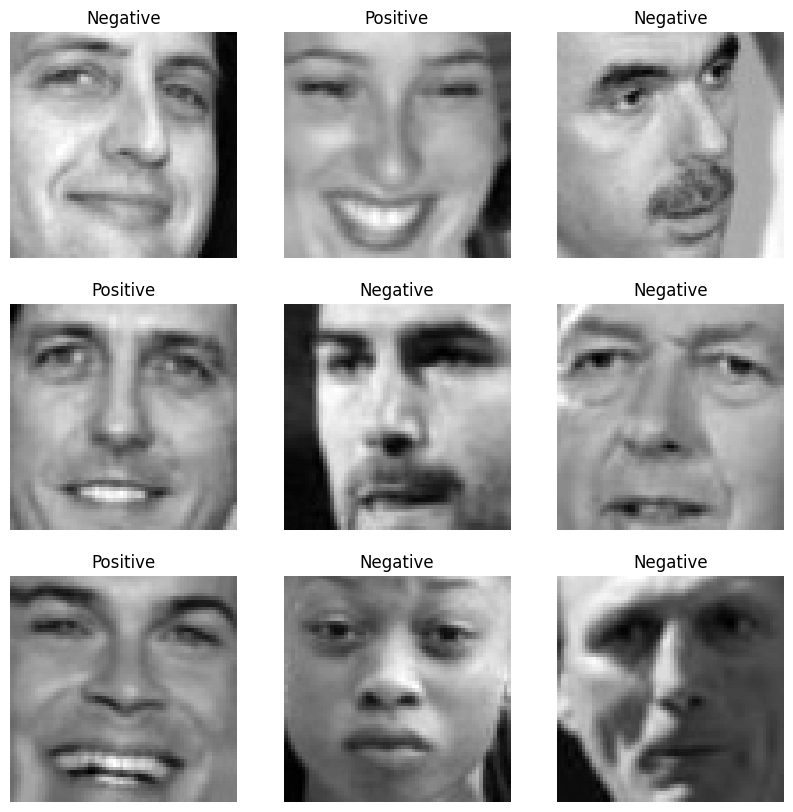

In [ ]:
import matplotlib.pyplot as plt

# Eğitim veri setinden bir batch alın ve örnek görüntüleri çizdirin
def plot_sample_images(images, labels, class_names, num_samples=9):
    plt.figure(figsize=(10, 10))
    for i in range(num_samples):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].reshape(img_height, img_width), cmap='gray')
        plt.title(class_names[labels[i]])
        plt.axis("off")
    plt.show()

# Etiket isimleri
class_names = ['Negative', 'Positive']

# İlk 9 örneği görselleştirme
plot_sample_images(train_images, train_labels, class_names)


##1.Improvement:Making More Complex

In [ ]:
from tensorflow.keras import models, layers

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Model derleme
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Model yapısını gösterme
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_51 (Conv2D)          (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_51 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_52 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_52 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_53 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_53 (MaxPooli  (None, 6, 6, 128)       

In [ ]:
epochs = 20
history = model.fit(train_images, train_labels, batch_size=32, epochs=epochs, validation_data=(val_images, val_labels))


Epoch 1/20
330/330 [==============================] - 4s 6ms/step - loss: 0.4072 - accuracy: 0.8327 - val_loss: 0.2665 - val_accuracy: 0.8918
Epoch 2/20
330/330 [==============================] - 2s 6ms/step - loss: 0.2570 - accuracy: 0.9067 - val_loss: 0.2267 - val_accuracy: 0.9145
Epoch 3/20
330/330 [==============================] - 2s 6ms/step - loss: 0.2210 - accuracy: 0.9178 - val_loss: 0.2125 - val_accuracy: 0.9206
Epoch 4/20
330/330 [==============================] - 2s 6ms/step - loss: 0.2062 - accuracy: 0.9244 - val_loss: 0.2157 - val_accuracy: 0.9157
Epoch 5/20
330/330 [==============================] - 2s 6ms/step - loss: 0.1956 - accuracy: 0.9249 - val_loss: 0.2023 - val_accuracy: 0.9267
Epoch 6/20
330/330 [==============================] - 2s 5ms/step - loss: 0.1835 - accuracy: 0.9301 - val_loss: 0.2096 - val_accuracy: 0.9267
Epoch 7/20
330/330 [==============================] - 2s 6ms/step - loss: 0.1715 - accuracy: 0.9356 - val_loss: 0.2089 - val_accuracy: 0.9271
Epoch 

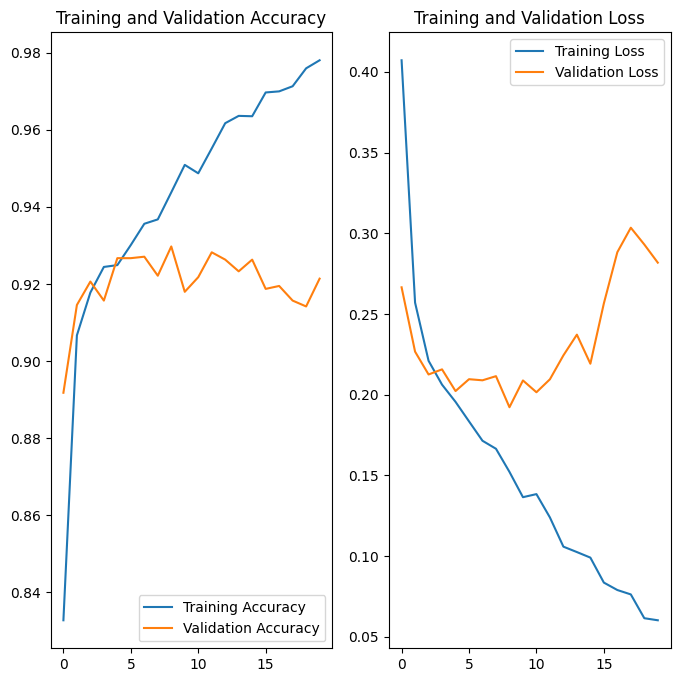

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

##2.Improvement:Adding Dropout

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.7),  # Regularization to prevent overfitting
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Regularization to prevent overfitting
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.7),  # Regularization to prevent overfitting
    layers.Dense(1, activation='sigmoid')
])



# Model derleme
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Model yapısını gösterme
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_59 (Conv2D)          (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_59 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_60 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_60 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_61 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_61 (MaxPooli  (None, 6, 6, 128)       

In [ ]:
epochs = 20
history = model.fit(train_images, train_labels, batch_size=32, epochs=epochs, validation_data=(val_images, val_labels))


Epoch 1/20
330/330 [==============================] - 4s 6ms/step - loss: 0.8380 - accuracy: 0.6966 - val_loss: 0.5643 - val_accuracy: 0.7341
Epoch 2/20
330/330 [==============================] - 2s 6ms/step - loss: 0.5412 - accuracy: 0.7304 - val_loss: 0.3711 - val_accuracy: 0.8549
Epoch 3/20
330/330 [==============================] - 2s 6ms/step - loss: 0.4130 - accuracy: 0.8304 - val_loss: 0.3039 - val_accuracy: 0.8747
Epoch 4/20
330/330 [==============================] - 2s 6ms/step - loss: 0.3382 - accuracy: 0.8731 - val_loss: 0.2834 - val_accuracy: 0.8876
Epoch 5/20
330/330 [==============================] - 2s 6ms/step - loss: 0.3180 - accuracy: 0.8783 - val_loss: 0.2550 - val_accuracy: 0.8967
Epoch 6/20
330/330 [==============================] - 2s 6ms/step - loss: 0.2913 - accuracy: 0.8874 - val_loss: 0.2519 - val_accuracy: 0.8986
Epoch 7/20
330/330 [==============================] - 2s 6ms/step - loss: 0.2761 - accuracy: 0.8969 - val_loss: 0.2533 - val_accuracy: 0.9009
Epoch 

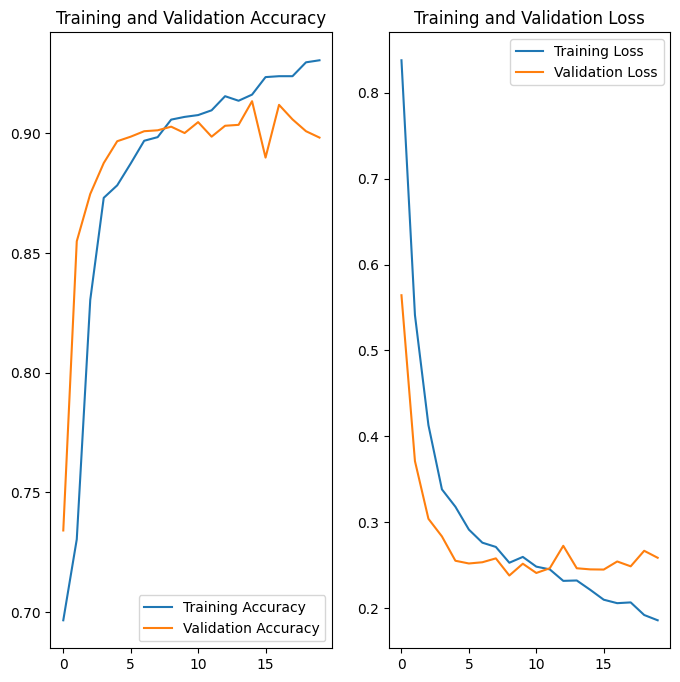

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


## 3.Improvement:Decreasing Learning Rate And Rescaling




In [ ]:
model = models.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 1)),
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.7),  # Regularization to prevent overfitting
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Regularization to prevent overfitting
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.7),  # Regularization to prevent overfitting
    layers.Dense(1, activation='sigmoid')
])


opt=tf.keras.optimizers.Adam(learning_rate=0.0001)
# Model derleme
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Model yapısını gösterme
model.summary()


Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 64, 64, 1)         0         
                                                                 
 conv2d_83 (Conv2D)          (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_83 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_84 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_84 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_85 (Conv2D)          (None, 12, 12, 128)     

In [ ]:
# Eğitim süreci
epochs = 20
history = model.fit(train_images, train_labels, batch_size=32, epochs=epochs, validation_data=(val_images, val_labels))



Epoch 1/20
330/330 [==============================] - 4s 6ms/step - loss: 0.6241 - accuracy: 0.6976 - val_loss: 0.5873 - val_accuracy: 0.7341
Epoch 2/20
330/330 [==============================] - 2s 6ms/step - loss: 0.6064 - accuracy: 0.7152 - val_loss: 0.5667 - val_accuracy: 0.7341
Epoch 3/20
330/330 [==============================] - 2s 6ms/step - loss: 0.5248 - accuracy: 0.7185 - val_loss: 0.3937 - val_accuracy: 0.8321
Epoch 4/20
330/330 [==============================] - 2s 6ms/step - loss: 0.3916 - accuracy: 0.8202 - val_loss: 0.2758 - val_accuracy: 0.8944
Epoch 5/20
330/330 [==============================] - 2s 6ms/step - loss: 0.3194 - accuracy: 0.8843 - val_loss: 0.2561 - val_accuracy: 0.9013
Epoch 6/20
330/330 [==============================] - 2s 6ms/step - loss: 0.2879 - accuracy: 0.8981 - val_loss: 0.2374 - val_accuracy: 0.9081
Epoch 7/20
330/330 [==============================] - 2s 6ms/step - loss: 0.2664 - accuracy: 0.9097 - val_loss: 0.2421 - val_accuracy: 0.9047
Epoch 

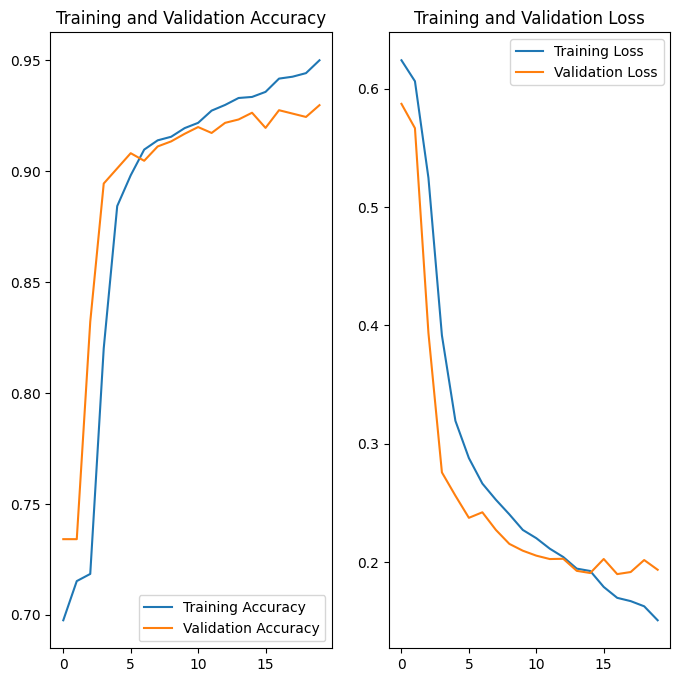

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

##4.Improvement:Model Checkpoint




In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Model checkpoint tanımlama
checkpoint_cb = ModelCheckpoint("best_model.h5",
                                save_best_only=True,
                                monitor='val_loss',
                                mode='min',
                                verbose=1)

# Model oluşturma
model = models.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.7),  # Regularization to prevent overfitting
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Regularization to prevent overfitting
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.7),  # Regularization to prevent overfitting
    layers.Dense(1, activation='sigmoid')
])

# Optimizer tanımlama
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

# Model derleme
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Model yapısını gösterme
model.summary()



Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 64, 64, 1)         0         
                                                                 
 conv2d_87 (Conv2D)          (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_87 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_88 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_88 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_89 (Conv2D)          (None, 12, 12, 128)     

In [ ]:
# Eğitim süreci
epochs = 20
history = model.fit(train_images, train_labels,
                    batch_size=32,
                    epochs=epochs,
                    validation_data=(val_images, val_labels),
                    callbacks=[checkpoint_cb])


Epoch 1/20
322/330 [============================>.] - ETA: 0s - loss: 0.6283 - accuracy: 0.6965
Epoch 1: val_loss improved from inf to 0.58218, saving model to best_model.h5
330/330 [==============================] - 5s 7ms/step - loss: 0.6271 - accuracy: 0.6976 - val_loss: 0.5822 - val_accuracy: 0.7341
Epoch 2/20
 21/330 [>.............................] - ETA: 1s - loss: 0.6222 - accuracy: 0.6949

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


330/330 [==============================] - ETA: 0s - loss: 0.6036 - accuracy: 0.7152
Epoch 2: val_loss improved from 0.58218 to 0.56877, saving model to best_model.h5
330/330 [==============================] - 2s 6ms/step - loss: 0.6036 - accuracy: 0.7152 - val_loss: 0.5688 - val_accuracy: 0.7341
Epoch 3/20
324/330 [============================>.] - ETA: 0s - loss: 0.5145 - accuracy: 0.7242
Epoch 3: val_loss improved from 0.56877 to 0.39316, saving model to best_model.h5
330/330 [==============================] - 2s 6ms/step - loss: 0.5138 - accuracy: 0.7241 - val_loss: 0.3932 - val_accuracy: 0.8625
Epoch 4/20
329/330 [============================>.] - ETA: 0s - loss: 0.3891 - accuracy: 0.8268
Epoch 4: val_loss improved from 0.39316 to 0.29312, saving model to best_model.h5
330/330 [==============================] - 2s 6ms/step - loss: 0.3890 - accuracy: 0.8269 - val_loss: 0.2931 - val_accuracy: 0.8842
Epoch 5/20
326/330 [============================>.] - ETA: 0s - loss: 0.3253 - accur

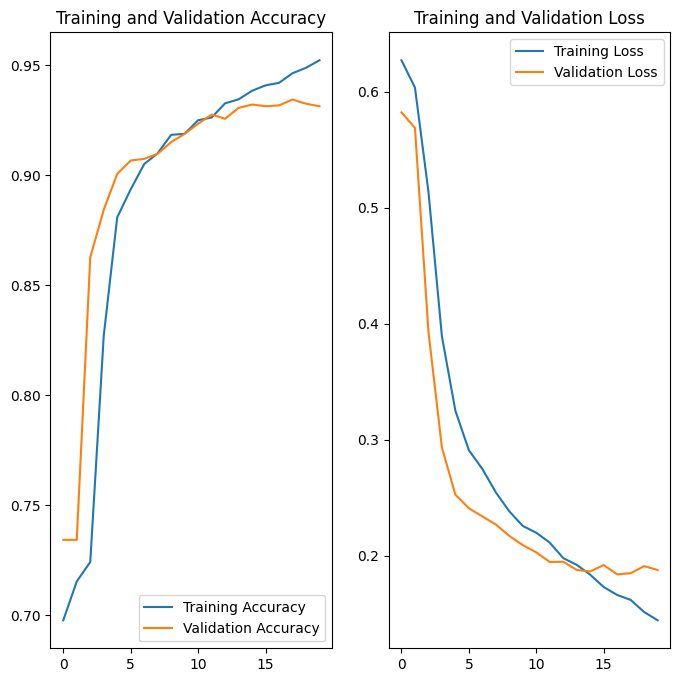

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(val_ds)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

83/83 [==============================] - 0s 2ms/step - loss: 0.1876 - accuracy: 0.9313
Validation Loss: 0.18764173984527588
Validation Accuracy: 0.9312571287155151


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Yeni resim dosya yolları
new_image_paths = [
    '/content/drive/MyDrive/SMILEpred/images.jpg',
    '/content/drive/MyDrive/SMILEpred/images1.jpg',
    '/content/drive/MyDrive/SMILEpred/images2.jpg',
    '/content/drive/MyDrive/SMILEpred/indir.jpg',
    '/content/drive/MyDrive/SMILEpred/indir1.jpg',
    '/content/drive/MyDrive/SMILEpred/indir2.jpg'
]

predictions = []

for img_path in new_image_paths:
    gray_image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    resized_image = cv2.resize(gray_image, (64, 64))

    # Reshaped image to be [height, width, channels]
    reshaped_image = np.expand_dims(resized_image, axis=-1)

    # Input tensor to be [batch_size, height, width, channels]
    input_tensor = np.expand_dims(reshaped_image, axis=0)

    # Veri tipini float32 yapın
    input_tensor = input_tensor.astype('float32')

    # Tahmin yapın
    prediction = model.predict(input_tensor)
    predictions.append(prediction[0][0])

print(f"Predictions: {predictions}")


1/1 [==============================] - 0s 21ms/step
Predictions: [0.00014901883, 0.003992045, 0.08134659, 0.98646265, 0.9980877, 0.9798533]


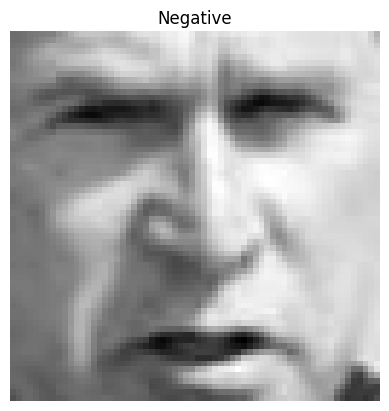

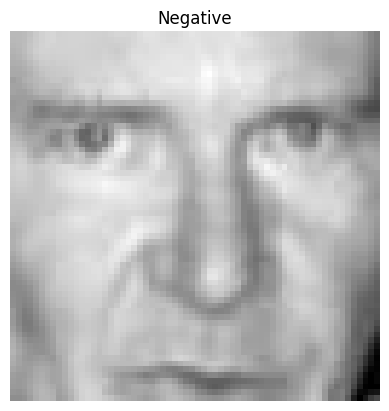

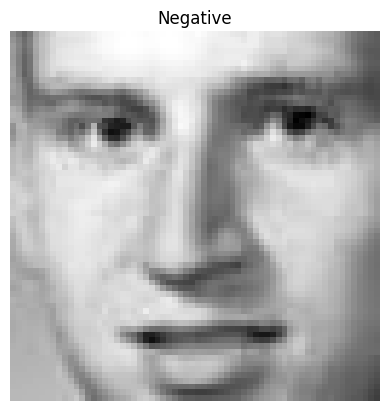

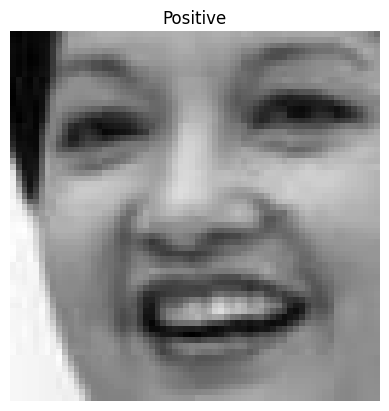

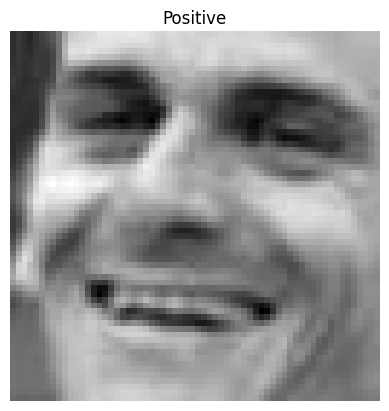

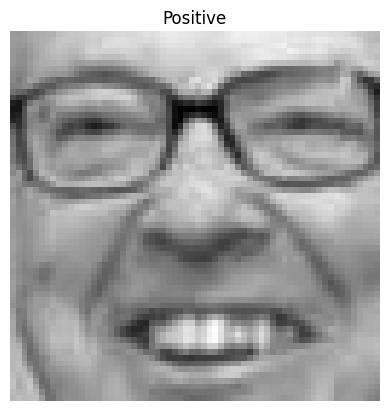

In [ ]:
i = 0
for img_path in new_image_paths:
  if predictions[i]*2 <0.3:
    gray_image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    plt.imshow(gray_image, cmap='gray')
    plt.title('Negative')
    plt.axis('off')  # Eksenleri kapatma
    plt.show()
  elif predictions[i]*2 > 0.3:
    gray_image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    plt.imshow(gray_image, cmap='gray')
    plt.title('Positive')
    plt.axis('off')  # Eksenleri kapatma
    plt.show()
  i=i+1